<h1><i> CREATING SIMPLE LINEAR REGRESSION MODEL FROM SCRATCH </i></h1>

<h3>What is Linear Regression?</h3>
<p>
  Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. The goal is to find the best-fitting line that represents the relationship between these variables. Mathematically, linear regression aims to minimize the sum of squared differences between the observed data points and the predicted values on the line.
</p>

Here are the step-by-step explanations for the mathematical formulas used in linear regression:

1. Mean Calculation:
   - The mean of an array can be calculated by summing up all the values and dividing by the number of elements.
   - Formula: mean = (sum of values) / (number of elements)
   - Implementation: `mean = np.sum(arr) / len(arr)`

2. Variance Calculation:
   - The variance measures the spread or dispersion of a dataset. It quantifies how far each number in the dataset is from the mean.
   - Formula: variance = sum((x - mean)^2) for each value x in the dataset
   - Implementation: `variance = np.sum((arr - mean) ** 2)`

3. Covariance Calculation:
   - Covariance measures how two variables vary together. It indicates the direction of the linear relationship between two variables.
   - Formula: covariance = sum((x - mean_x) * (y - mean_y)) for corresponding values x and y in the datasets
   - Implementation: `covariance = np.sum((arr_x - mean_x) * (arr_y - mean_y))`

4. Slope Calculation:
   - In linear regression, the slope (m) represents the change in the dependent variable (y) per unit change in the independent variable (x).
   - Formula: slope = covariance(x, y) / variance(x)
   - Implementation: `slope = covariance / variance`

5. Intercept Calculation:
   - The intercept (c) represents the value of the dependent variable (y) when the independent variable (x) is zero.
   - Formula: intercept = mean_y - slope * mean_x
   - Implementation: `intercept = mean_y - slope * mean_x`

These formulas are used in the `get_mean()`, `get_variance()`, `get_covariance()`, and `get_coefficients()` methods of the `LinearRegression` class to calculate the mean, variance, covariance, slope, and intercept for linear regression.

<h1> Importing Libraries </h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error

<h1> Helper Functions </h1>

In [2]:
class LinearRegression:
    """
    Linear regression model for predicting a target variable based on a single feature.

    Args:
        dataset_file (str): File path of the dataset.

    Attributes:
        dataset_file (str): File path of the dataset.
        df (pd.DataFrame): Dataframe containing the dataset.
        x (ndarray): Array of feature values.
        y (ndarray): Array of target values.
    """

    def __init__(self, dataset_file):
        self.dataset_file = dataset_file
        self.df = None
        self.x = None
        self.y = None

    def read_data(self):
        """
        Read the dataset from a CSV file and assign feature and target values.
        """
        self.df = pd.read_csv(self.dataset_file)
        self.x = self.df['X'].values
        self.y = self.df['Y'].values

    def get_mean(self, arr):
        """
        Calculate the mean of an array.

        Args:
            arr (ndarray): Input array.

        Returns:
            float: Mean value.
        """
        return np.sum(arr) / len(arr)

    def get_variance(self, arr, mean):
        """
        Calculate the variance of an array.

        Args:
            arr (ndarray): Input array.
            mean (float): Mean value of the array.

        Returns:
            float: Variance value.
        """
        return np.sum((arr - mean) ** 2)

    def get_covariance(self, arr_x, mean_x, arr_y, mean_y):
        """
        Calculate the covariance between two arrays.

        Args:
            arr_x (ndarray): First input array.
            mean_x (float): Mean value of the first array.
            arr_y (ndarray): Second input array.
            mean_y (float): Mean value of the second array.

        Returns:
            float: Covariance value.
        """
        final_arr = (arr_x - mean_x) * (arr_y - mean_y)
        return np.sum(final_arr)

    def get_coefficients(self, x, y):
        """
        Calculate the slope and intercept coefficients for linear regression.

        Args:
            x (ndarray): Array of feature values.
            y (ndarray): Array of target values.

        Returns:
            tuple: Slope and intercept coefficients (m, c).
        """
        x_mean = self.get_mean(x)
        y_mean = self.get_mean(y)
        m = self.get_covariance(x, x_mean, y, y_mean) / self.get_variance(x, x_mean)
        c = y_mean - x_mean * m
        return m, c

    def linear_regression(self, x_train, y_train, x_test, y_test):
        """
        Perform linear regression on the training data and evaluate the model using the test data.

        Args:
            x_train (ndarray): Array of feature values for training.
            y_train (ndarray): Array of target values for training.
            x_test (ndarray): Array of feature values for testing.
            y_test (ndarray): Array of target values for testing.

        Returns:
            list: Predicted target values for the test data.
        """
        prediction = []
        m, c = self.get_coefficients(x_train, y_train)
        for x in x_test:
            y = m * x + c
            prediction.append(y)

        r2 = r2_score(prediction, y_test)
        mse = mean_squared_error(prediction, y_test)
        print("The R2 score of the model is:", r2)
        print("The MSE score of the model is:", mse)
        return prediction

    def plot_reg_line(self, x, y):
        """
        Plot the scatter plot of the data points and the regression line.

        Args:
            x (ndarray): Array of feature values.
            y (ndarray): Array of target values.
        """
        prediction = []
        m, c = self.get_coefficients(x, y)
        for x0 in range(1, 100):
            yhat = m * x0 + c
            prediction.append(yhat)

        fig = plt.figure(figsize=(20, 7))
        plt.subplot(1, 2, 1)
        sns.scatterplot(x=x, y=y)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Scatter Plot between X and Y')

        plt.subplot(1, 2, 2)
        sns.scatterplot(x=x, y=y, color='blue')
        sns.lineplot(x=[i for i in range(1, 100)], y=prediction, color='red')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Regression Plot')
        plt.show()


<h1> Main Function </h1>

The R2 score of the model is: 0.7951065855970764
The MSE score of the model is: 367.28282829514217


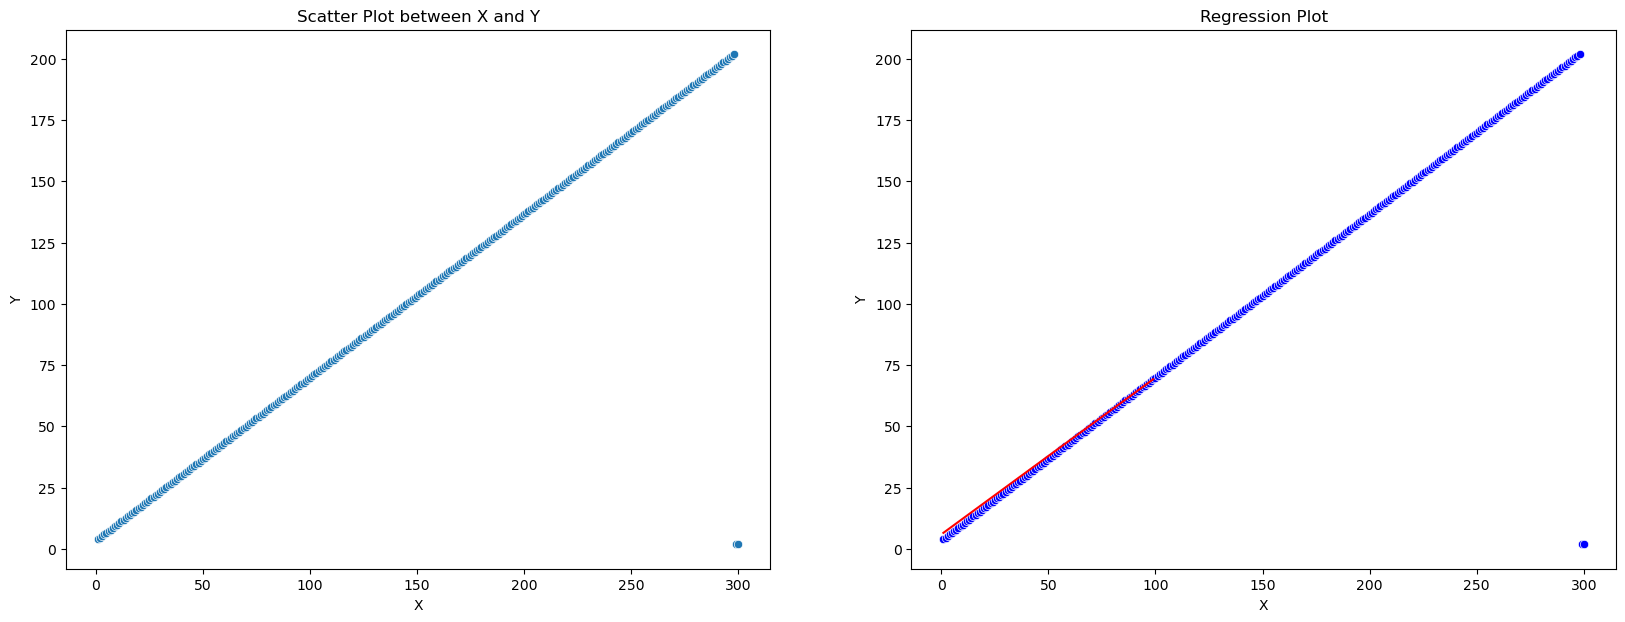

In [3]:
# Create an instance of the LinearRegression class
regression = LinearRegression('dataset.csv')

# Call the necessary methods
regression.read_data()

# Split the data into training and testing sets
x_train = regression.x[:80]
y_train = regression.y[:80]
x_test = regression.x[80:]
y_test = regression.y[80:]

# Perform linear regression using the training and testing data
regression.linear_regression(regression.x[:80], regression.y[:80], regression.x[80:], regression.y[80:])
regression.plot_reg_line(regression.x, regression.y)

<h1> Compares the output with SKLEARN Built-In Linear Regression Library</h1>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

<h1> Helper Functions </h1>

In [5]:
class LinearRegressionModel:
    def __init__(self, dataset_file):
        """
        Initializes the LinearRegressionModel class.

        Args:
            dataset_file (str): The path to the dataset file.
        """
        self.dataset_file = dataset_file
        self.df = None
        self.x = None
        self.y = None
        self.reg = LinearRegression()

    def read_data(self):
        """
        Reads the dataset file and assigns the values of X and Y to self.x and self.y respectively.
        """
        self.df = pd.read_csv(self.dataset_file)
        self.x = self.df['X'].values
        self.y = self.df['Y'].values

    def train_model(self):
        """
        Trains the linear regression model using the training data.
        """
        self.reg.fit(self.x[:80].reshape(-1, 1), self.y[:80])

    def evaluate_model(self):
        """
        Evaluates the trained model using the test data and prints the R2 score and MSE score.
        """
        prediction = self.reg.predict(self.x[80:].reshape(-1, 1))
        r2 = r2_score(prediction, self.y[80:])
        mse = mean_squared_error(prediction, self.y[80:])
        print("The R2 score of the model is: ", r2)
        print("The MSE score of the model is: ", mse)

    def predict_values(self):
        """
        Predicts the target values for a range of input values.

        Returns:
            numpy.ndarray: The predicted target values.
        """
        prediction = self.reg.predict(np.array([i for i in range(1, 100)]).reshape(-1, 1))
        return prediction

    def plot_data(self):
        """
        Plots the scatter plot of X and Y and the regression line.
        """
        prediction = self.predict_values()
        fig = plt.figure(figsize=(20, 7))
        plt.subplot(1, 2, 1)
        sns.scatterplot(x=self.x, y=self.y)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Scatter Plot between X and Y')

        plt.subplot(1, 2, 2)
        sns.scatterplot(x=self.x, y=self.y, color='green')
        sns.lineplot(x=[i for i in range(1, 100)], y=prediction, color='red')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Regression Plot')
        plt.show()

<h1> Main Function </h1>

The R2 score of the model is:  0.7951065855970764
The MSE score of the model is:  367.28282829514217


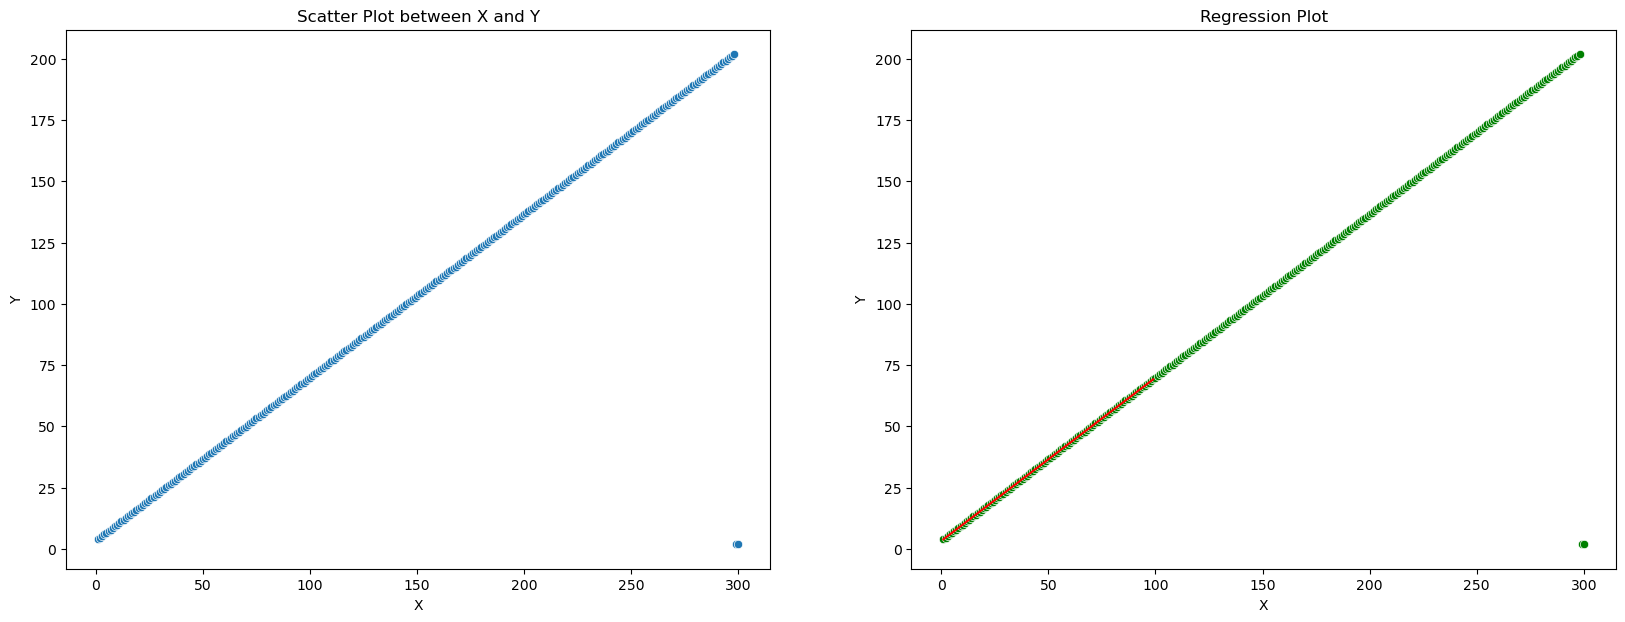

In [6]:
# Create an instance of the LinearRegression class
model = LinearRegressionModel('dataset.csv')

# Call the necessary methods
model.read_data()

# Split the data into training and testing sets
model.train_model()

# Evaluate the model
model.evaluate_model()

# Plot the regression line
model.plot_data()